In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os

In [2]:
#plt.rcParams['text.usetex'] = True
#plt.rcParams["figure.figsize"] = (6,5)
#plt.tight_layout()
#plt.rc('legend', fontsize=10)

In [3]:
#
df_gr_trg_effArea_fit = pd.read_csv('gr_trg_effArea_fit.csv')
df_gr_trg_effArea_AdvCam_fit = pd.read_csv('gr_trg_effArea_AdvCam_fit.csv')
df_gr_trg_effArea_AdvCam_vs_PMT_fit = pd.read_csv('gr_trg_effArea_AdvCam_vs_PMT_fit.csv')
#
df_gr_gamma_rates_trg_LST = pd.read_csv('gr_gamma_rates_trg_LST.csv')
df_gr_gamma_rates_trg_LST_AdvCam = pd.read_csv('gr_gamma_rates_trg_LST_AdvCam.csv')

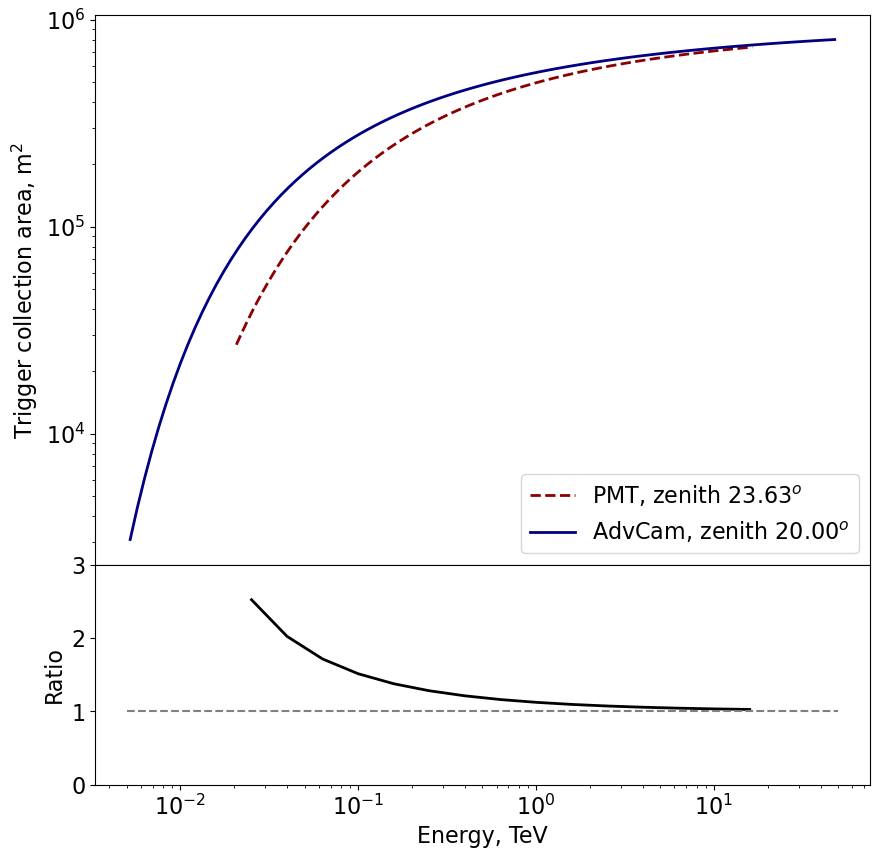

In [76]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, height_ratios=[5,2],figsize=(10,10))
fig.subplots_adjust(hspace=0.0, wspace=0.0)

#ax[0].set_xlabel('Energy, TeV',fontsize=16)
ax[0].set_ylabel('Trigger collection area, m$^2$',fontsize=16)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
#ax[0].grid(True)
#
ax[0].plot(df_gr_trg_effArea_fit['xx'].values,df_gr_trg_effArea_fit['yy'].values,
         lw=2,color='darkred',
         ls='dashed',
         label='PMT, zenith 23.63$^o$')
ax[0].plot(df_gr_trg_effArea_AdvCam_fit['xx'].values,df_gr_trg_effArea_AdvCam_fit['yy'].values,
         lw=2,
         color='navy',
         label='AdvCam, zenith 20.00$^o$')
ax[0].legend(fontsize=16)
#
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=16)

#ax[1].grid(True)
ax[1].plot(df_gr_trg_effArea_AdvCam_vs_PMT_fit['xx'].values,df_gr_trg_effArea_AdvCam_vs_PMT_fit['yy'].values,
         lw=2,
         color='black')
ax[1].set_xlabel('Energy, TeV',fontsize=16)

ax[1].hlines(1,0.005,50,ls='dashed',color='grey')

ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=16)
ax[1].set_ylabel('Ratio',fontsize=16)
ax[1].set_ylim(0,3);

plt.savefig('trg_effArea_AdvCam_vs_PMT_fit.pdf', bbox_inches='tight')

# plt.show()

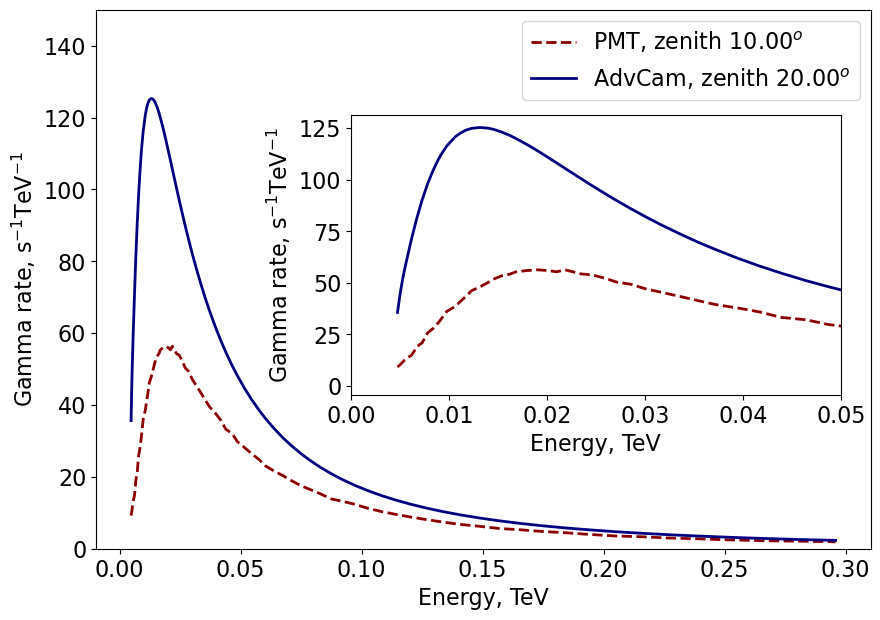

In [70]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_gr_gamma_rates_trg_LST['xx'].values,df_gr_gamma_rates_trg_LST['yy'].values,
        lw=2,color='darkred',
        ls='dashed',
        label='PMT, zenith 10.00$^o$')
ax.plot(df_gr_gamma_rates_trg_LST_AdvCam['xx'].values,df_gr_gamma_rates_trg_LST_AdvCam['yy'].values,
        lw=2,
        color='navy',
        label='AdvCam, zenith 20.00$^o$')
ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.set_xlabel('Energy, TeV',fontsize=16)
ax.set_ylabel('Gamma rate, s$^{-1}$TeV$^{-1}$',fontsize=16)
ax.set_ylim(0,150);


ax_zoom = plt.axes([0.38, 0.33, 0.49, 0.4])  # (left, bottom, width, height)

ax_zoom.plot(df_gr_gamma_rates_trg_LST['xx'].values,df_gr_gamma_rates_trg_LST['yy'].values,
        lw=2,color='darkred',
        ls='dashed',
        label='PMT, zenith 10.00$^o$')
ax_zoom.plot(df_gr_gamma_rates_trg_LST_AdvCam['xx'].values,df_gr_gamma_rates_trg_LST_AdvCam['yy'].values,
        lw=2,
        color='navy',
        label='AdvCam, zenith 20.00$^o$')
ax_zoom.set_xlim(0,0.05);

ax_zoom.set_xlabel('Energy, TeV',fontsize=16)
ax_zoom.set_ylabel('Gamma rate, s$^{-1}$TeV$^{-1}$',fontsize=16)
ax_zoom.tick_params(axis='both', which='major', labelsize=16)
ax_zoom.tick_params(axis='both', which='minor', labelsize=16)

plt.savefig('trg_crab_rate_AdvCam_vs_PMT.pdf', bbox_inches='tight')

# ax_zoom = plt.axes([0.56, 0.600, 0.14, 0.150])  # (left, bottom, width, height)
# ax_zoom.plot(timelist1[:500], dfraw_CorrectedI[dfraw_currents['Over Voltage (V)'][28]][:500], '-o',c=colors1[0], label="Cherenkov jump")
# ax_zoom.set_xlim(x_zoom)
# ax_zoom.set_ylim(y_zoom)
# ax_zoom.legend(loc=4, fontsize=11)
# ax_zoom.set_title('Zoomed', fontsize=13)
# ax_zoom = plt.gca()
# ax_zoom.spines['bottom'].set_color('red')
# ax_zoom.spines['top'].set_color('red')
# ax_zoom.spines['left'].set_color('red')
# ax_zoom.spines['right'].set_color('red')
# ax_zoom.tick_params(axis='both', which='major', labelsize=12)
# ax_zoom.tick_params(axis='both', which='minor', labelsize=12)
# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_powerlimits((-2, 2))  # Adjust these limits if needed
# ax_zoom.yaxis.set_major_formatter(formatter)
# ax_zoom.yaxis.get_offset_text().set_fontsize(12)

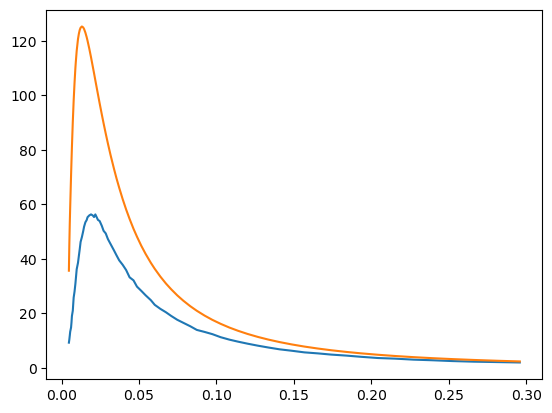

In [14]:
plt.plot(df_gr_gamma_rates_trg_LST['xx'].values,df_gr_gamma_rates_trg_LST['yy'].values)
plt.plot(df_gr_gamma_rates_trg_LST_AdvCam['xx'].values,df_gr_gamma_rates_trg_LST_AdvCam['yy'].values)

In [5]:
df['VI_table']

,Sourced_voltage,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,Current_Average
0,-1.5,7.780170e-04,7.780240e-04,7.780150e-04,7.780180e-04,7.780130e-04,7.780190e-04,7.780160e-04,7.780330e-04,7.780150e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.780179e-04
1,-1.4,6.942460e-04,6.942460e-04,6.942470e-04,6.942430e-04,6.942340e-04,6.942280e-04,6.942430e-04,6.942520e-04,6.942410e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.942434e-04
2,-1.3,6.108690e-04,6.108590e-04,6.108560e-04,6.108520e-04,6.108650e-04,6.108480e-04,6.108630e-04,6.108560e-04,6.108490e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.108574e-04
3,-1.2,5.279930e-04,5.280130e-04,5.280090e-04,5.279850e-04,5.279950e-04,5.280050e-04,5.280020e-04,5.279950e-04,5.279960e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.279999e-04
4,-1.1,4.458370e-04,4.458350e-04,4.458410e-04,4.458270e-04,4.458350e-04,4.458430e-04,4.458280e-04,4.458280e-04,4.458340e-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.458340e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,41.2,-5.941220e-07,-6.000520e-07,-6.076240e-07,-6.339880e-07,-5.957910e-07,-5.927590e-07,-6.330600e-07,-6.183310e-07,-6.061940e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.070771e-07
87,41.4,-6.871880e-07,-7.277560e-07,-6.891830e-07,-6.856990e-07,-6.594930e-07,-6.985720e-07,-6.717680e-07,-6.453630e-07,-6.677940e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.795038e-07
88,41.6,-7.666720e-07,-7.675830e-07,-7.652880e-07,-7.501020e-07,-7.582150e-07,-7.544160e-07,-7.607660e-07,-7.308010e-07,-7.564770e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.599399e-07
89,41.8,-8.872040e-07,-8.741900e-07,-8.619600e-07,-8.628940e-07,-8.709400e-07,-8.818680e-07,-8.896200e-07,-8.779710e-07,-8.646070e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.755831e-07


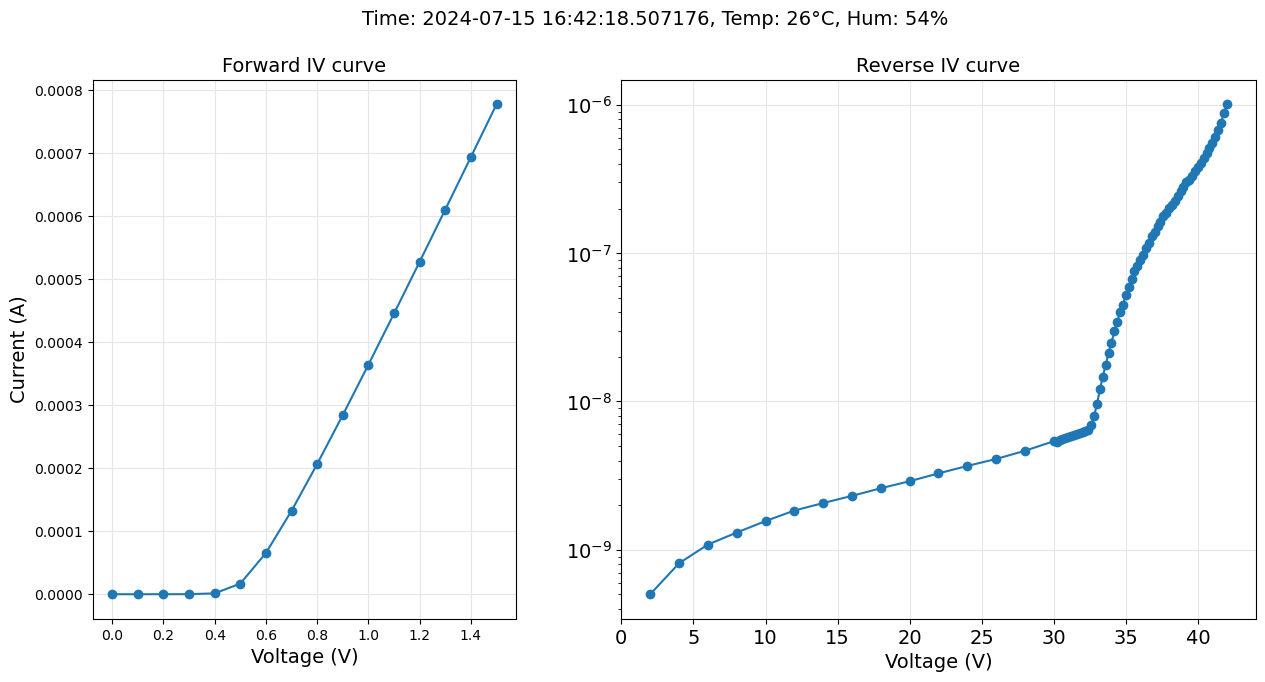

In [6]:
plottingOneIVCurve(df, 16)

In [7]:
file_FBK_TILE01_list=["data/FBK_TILE01_CH00_15.07.2024-16:11:01.txt",
                      "data/FBK_TILE01_CH04_15.07.2024-19:46:47.txt",
                      "data/FBK_TILE01_CH07_15.07.2024-19:50:52.txt",
                      "data/FBK_TILE01_CH09_15.07.2024-16:14:59.txt",
                      "data/FBK_TILE01_CH12_15.07.2024-19:54:48.txt",
                      "data/FBK_TILE01_CH25_15.07.2024-16:18:38.txt",
                      "data/FBK_TILE01_CH27_15.07.2024-16:22:47.txt",
                      "data/FBK_TILE01_CH31_15.07.2024-19:58:38.txt",
                      "data/FBK_TILE01_CH32_15.07.2024-16:30:20.txt",
                      "data/FBK_TILE01_CH35_15.07.2024-16:34:26.txt",
                      "data/FBK_TILE01_CH38_15.07.2024-20:02:24.txt",
                      "data/FBK_TILE01_CH48_15.07.2024-16:38:21.txt",
                      "data/FBK_TILE01_CH52_15.07.2024-20:06:13.txt",
                      "data/FBK_TILE01_CH54_15.07.2024-20:10:01.txt",
                      "data/FBK_TILE01_CH57_15.07.2024-16:42:11.txt",
                      "data/FBK_TILE01_CH60_15.07.2024-20:13:44.txt"]
#
CH_FBK_TILE01_list=["CH00", "CH04", "CH07", "CH09", "CH12", "CH25", "CH27", 
                    "CH31", "CH32", "CH35", "CH38", "CH48", "CH52", "CH54", 
                    "CH57", "CH60"]
#
print(file_FBK_TILE01_list[0])

data/FBK_TILE01_CH00_15.07.2024-16:11:01.txt


In [8]:
df_file_FBK_TILE01_one = readingOneFile(file_FBK_TILE01_list[0]) 

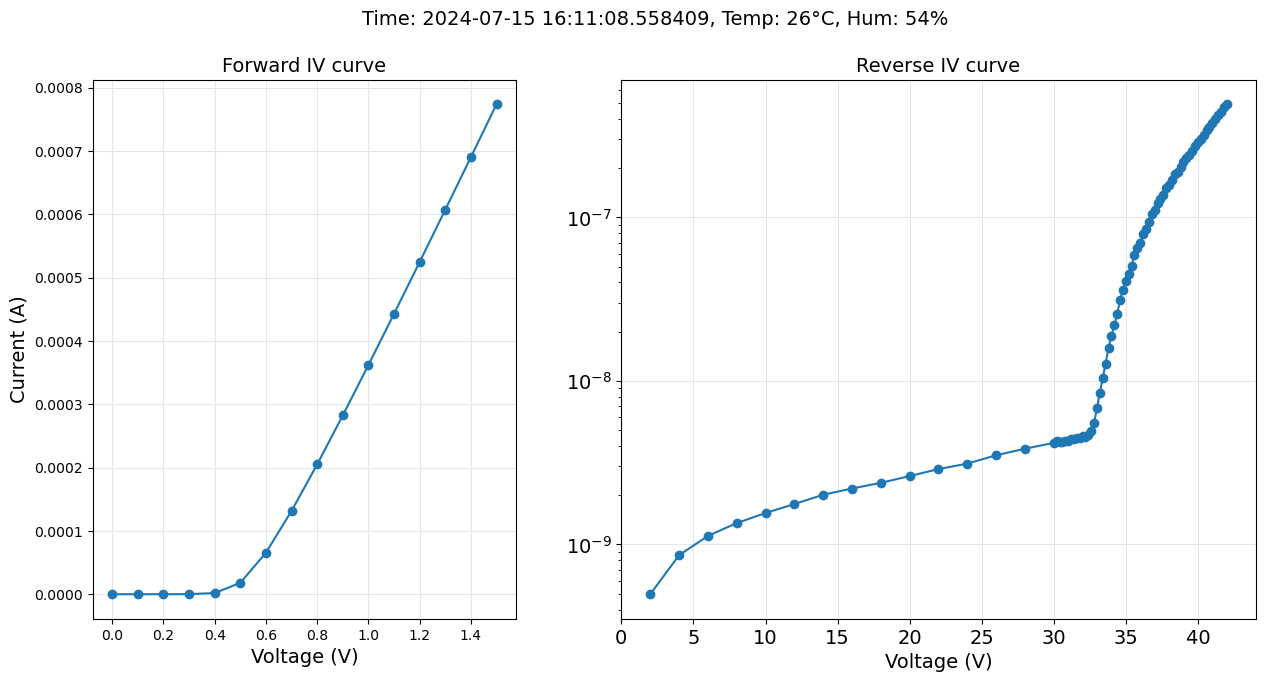

In [9]:
plottingOneIVCurve(df_file_FBK_TILE01_one, 16)

In [10]:
dfl_file_FBK_TILE01=[]
for name in file_FBK_TILE01_list:
    if os.path.exists(name):
        dfl_file_FBK_TILE01.append(readingOneFile(name))
    else:
        dfl_file_FBK_TILE01.append(np.nan)

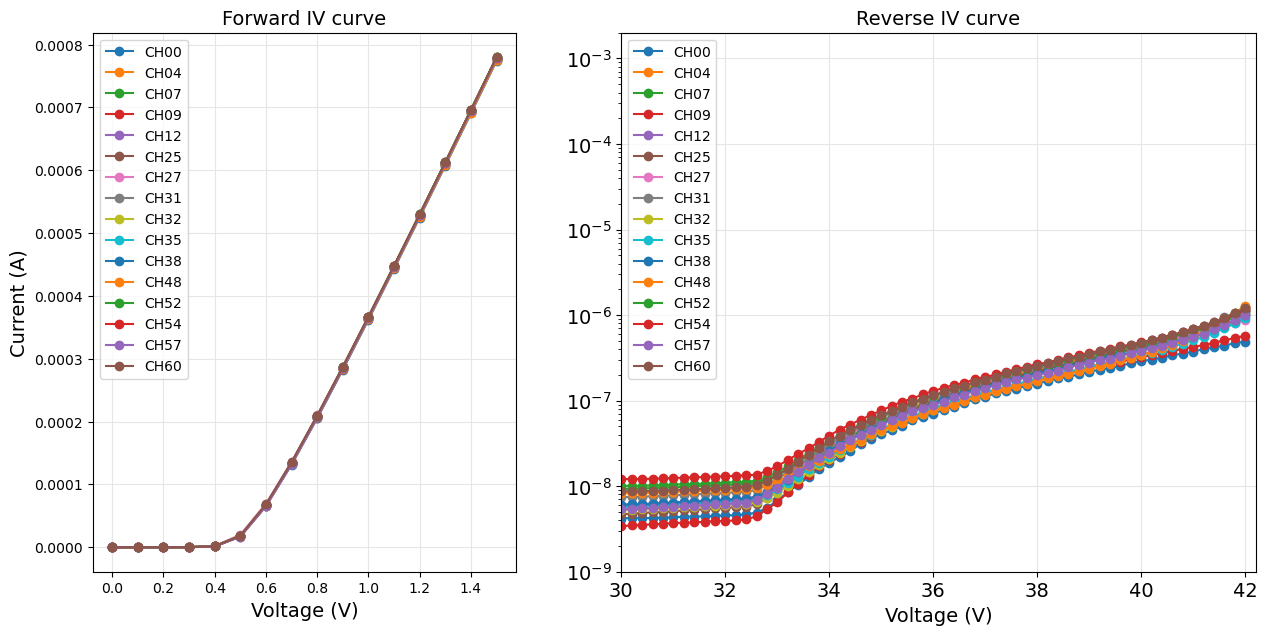

In [11]:
plottingListIVCurve(dfl_file_FBK_TILE01, 16, CH_FBK_TILE01_list)

In [12]:
file_FBK_TILE05_list=["data/FBK_TILE05_CH01_16.07.2024-10:49:18.txt",
                      "data/FBK_TILE05_CH03_16.07.2024-10:53:12.txt",
                      "data/FBK_TILE05_CH08_16.07.2024-10:56:53.txt",
                      "data/FBK_TILE05_CH11_16.07.2024-12:00:07.txt",
                      "data/FBK_TILE05_CH12_16.07.2024-12:29:40.txt",
                      "data/FBK_TILE05_CH14_16.07.2024-12:33:52.txt",
                      "data/FBK_TILE05_CH25_16.07.2024-11:00:33.txt",
                      "data/FBK_TILE05_CH28_16.07.2024-12:43:21.txt",
                      "data/FBK_TILE05_CH30_16.07.2024-12:50:20.txt",
                      "data/FBK_TILE05_CH32_16.07.2024-11:04:17.txt",
                      "data/FBK_TILE05_CH36_16.07.2024-12:54:08.txt",
                      "data/FBK_TILE05_CH38_16.07.2024-13:03:44.txt",
                      "data/FBK_TILE05_CH48_16.07.2024-11:07:58.txt",
                      "data/FBK_TILE05_CH51_16.07.2024-11:11:47.txt",
                      "data/FBK_TILE05_CH54_16.07.2024-13:07:48.txt",
                      "data/FBK_TILE05_CH57_16.07.2024-11:15:27.txt",
                      "data/FBK_TILE05_CH60_16.07.2024-13:11:34.txt"]
CH_FBK_TILE05_list=["CH01", "CH03", "CH08", "CH11", "CH12", "CH14", "CH25", "CH28", 
                    "CH30", "CH32", "CH36", "CH38", "CH48", "CH51", "CH54", "CH57",
                    "CH60"]

In [13]:
dfl_file_FBK_TILE05=[]
for name in file_FBK_TILE05_list:
    if os.path.exists(name):
        dfl_file_FBK_TILE05.append(readingOneFile(name))
    else:
        dfl_file_FBK_TILE05.append(np.nan)

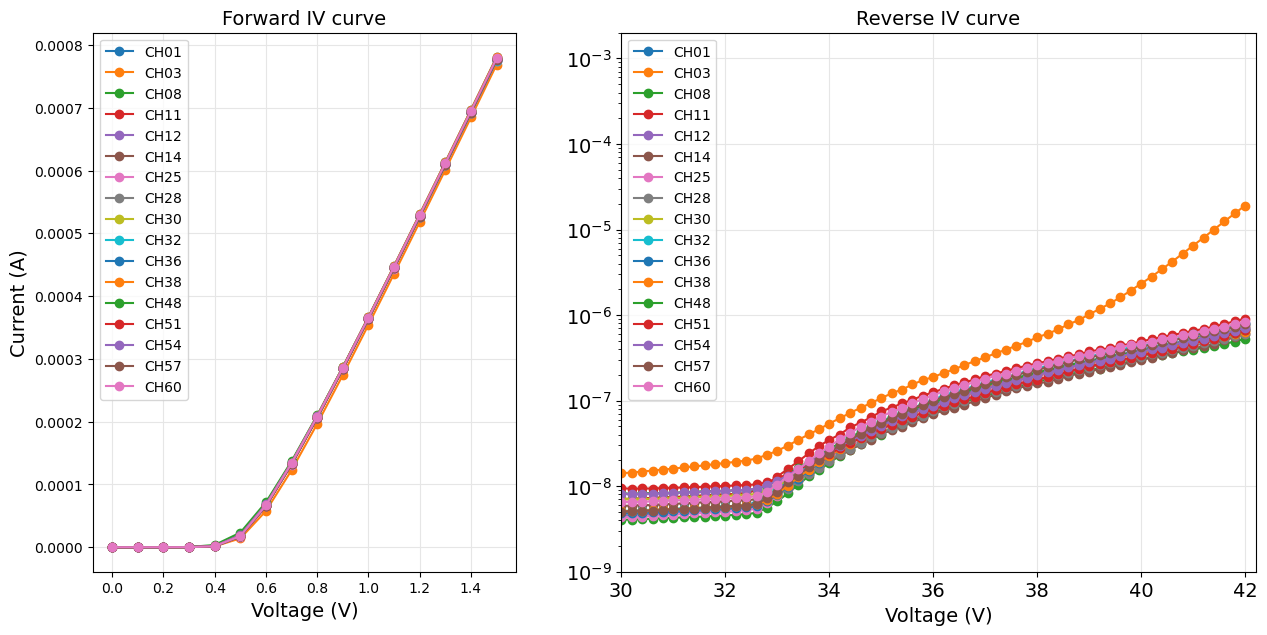

In [14]:
plottingListIVCurve(dfl_file_FBK_TILE05, 16, CH_FBK_TILE05_list)

In [15]:
file_HAM_TILE01_list=["data/HAM_TILE01_CH00_16.07.2024-14:31:25.txt",
                      "data/HAM_TILE01_CH09_16.07.2024-14:37:25.txt",
                      "data/HAM_TILE01_CH12_16.07.2024-15:15:30.txt",
                      "data/HAM_TILE01_CH14_16.07.2024-15:18:17.txt",
                      "data/HAM_TILE01_CH25_16.07.2024-14:40:06.txt",
                      "data/HAM_TILE01_CH27_16.07.2024-14:42:47.txt",
                      "data/HAM_TILE01_CH28_16.07.2024-15:21:06.txt",
                      "data/HAM_TILE01_CH30_16.07.2024-15:23:57.txt",
                      "data/HAM_TILE01_CH32_16.07.2024-14:45:28.txt",
                      "data/HAM_TILE01_CH35_16.07.2024-14:48:27.txt",
                      "data/HAM_TILE01_CH36_16.07.2024-15:26:51.txt",
                      "data/HAM_TILE01_CH38_16.07.2024-15:29:40.txt",
                      "data/HAM_TILE01_CH48_16.07.2024-14:51:19.txt",
                      "data/HAM_TILE01_CH54_16.07.2024-15:32:31.txt",
                      "data/HAM_TILE01_CH57_16.07.2024-14:54:11.txt",
                      "data/HAM_TILE01_CH60_16.07.2024-15:35:15.txt"]
CH_HAM_TILE01_list=[ "CH00", "CH09", "CH12", "CH14", "CH25", "CH27", "CH28", "CH30",
                     "CH32", "CH35", "CH36", "CH38", "CH48", "CH54", "CH57", "CH60"]

In [16]:
dfl_file_HAM_TILE01=[]
for name in file_HAM_TILE01_list:
    if os.path.exists(name):
        dfl_file_HAM_TILE01.append(readingOneFile(name))
    else:
        dfl_file_HAM_TILE01.append(np.nan)

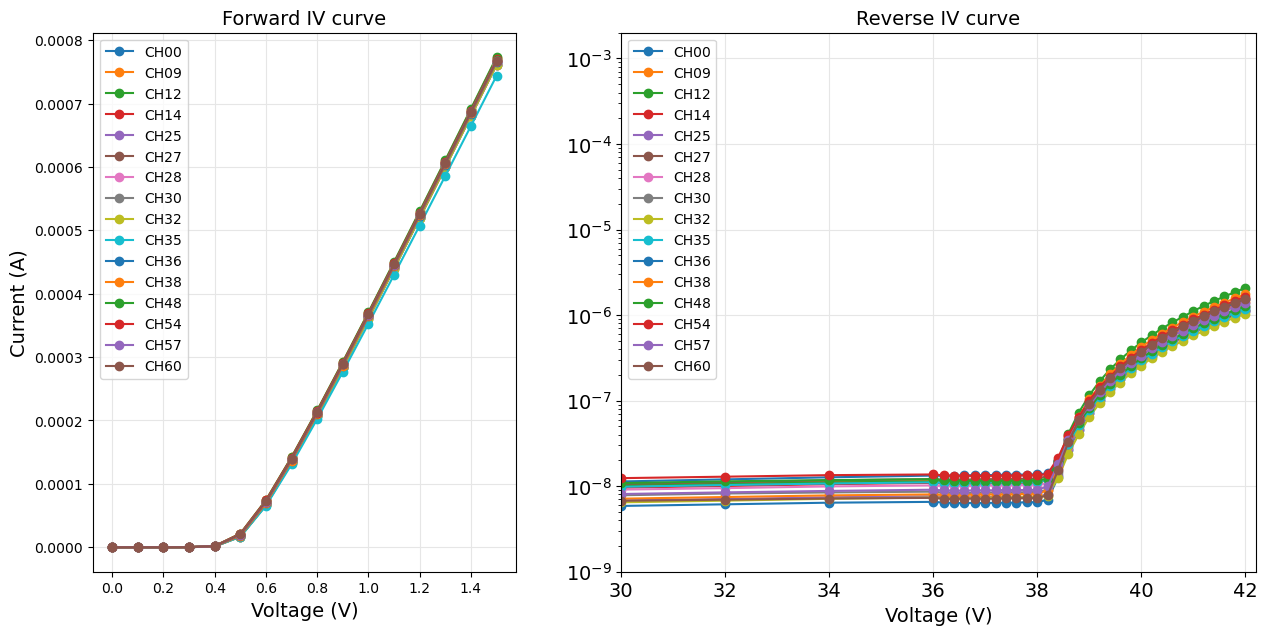

In [17]:
plottingListIVCurve(dfl_file_HAM_TILE01, 16, CH_HAM_TILE01_list)

In [18]:
file_FBK_TILE01_0Gy_list=["data/FBK_TILE01_CH00_17.07.2024-12:05:47.txt",
                         "data/FBK_TILE01_CH09_17.07.2024-12:09:37.txt",
                         "data/FBK_TILE01_CH48_17.07.2024-12:13:35.txt",
                         "data/FBK_TILE01_CH57_17.07.2024-12:17:34.txt"]

CH_FBK_TILE01_0Gy_list=[ "CH00", "CH09", "CH48","CH57"] 

In [19]:
dfl_file_FBK_TILE01_0Gy=[]
for name in file_FBK_TILE01_0Gy_list:
    if os.path.exists(name):
        dfl_file_FBK_TILE01_0Gy.append(readingOneFile(name))
    else:
        dfl_file_FBK_TILE01_0Gy.append(np.nan)

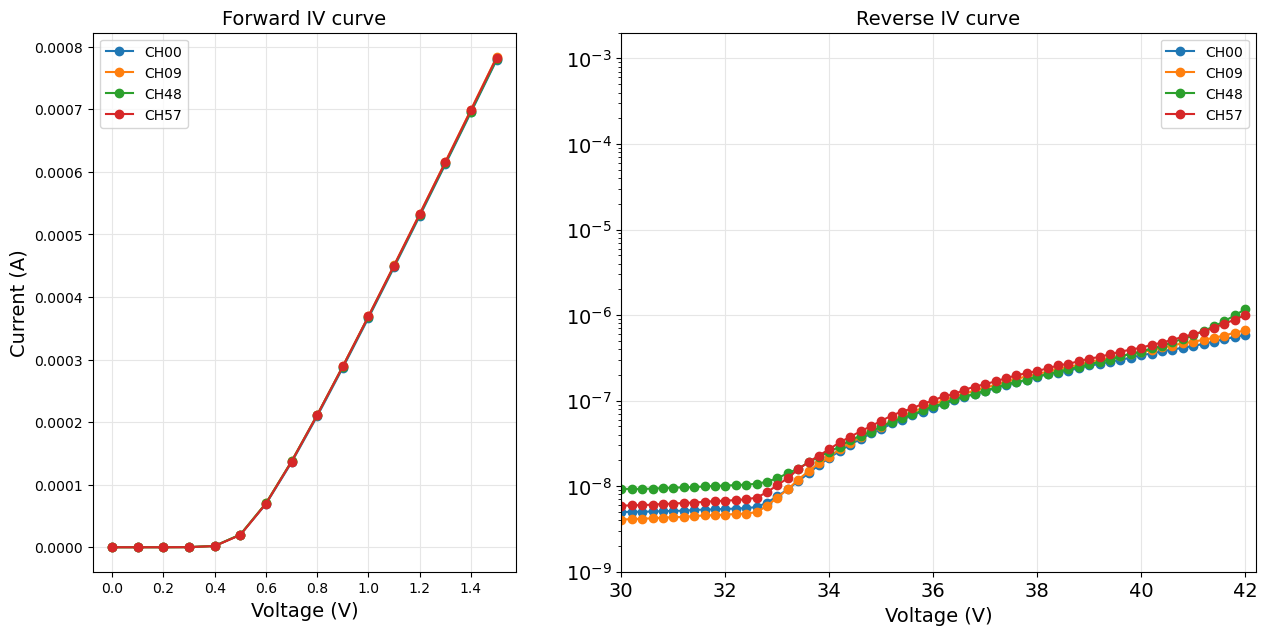

In [20]:
plottingListIVCurve(dfl_file_FBK_TILE01_0Gy, 16, CH_FBK_TILE01_0Gy_list)

In [21]:
"""
file_tmp=["data/HAM_TILE01_CH00_18.07.2024-15:27:33.txt",
          "data/HAM_TILE01_CH01_18.07.2024-15:30:15.txt",
          "data/HAM_TILE01_CH09_16.07.2024-14:37:25.txt",
          "data/HAM_TILE01_CH00_18.07.2024-16:39:46.txt",
          "data/HAM_TILE01_CH01_18.07.2024-16:42:33.txt",
          "data/HAM_TILE01_CH08_18.07.2024-16:45:44.txt",
          "data/HAM_TILE01_CH09_18.07.2024-16:48:31.txt",
          "data/FBK_TILE05_CH00_17.07.2024-19:02:08.txt",
          "data/FBK_TILE05_CH00_18.07.2024-10:40:18.txt",
          "data/HAM_TILE01_CH06_18.07.2024-17:16:11.txt",
          "data/HAM_TILE01_CH07_18.07.2024-17:18:58.txt",
          "data/HAM_TILE01_CH14_18.07.2024-17:22:03.txt",
          "data/HAM_TILE01_CH15_18.07.2024-17:24:50.txt",
          "data/FBK_TILE01_CH00_17.07.2024-12:05:47.txt",
          "data/HAM_TILE01_CH48_18.07.2024-18:14:14.txt",
          "data/HAM_TILE01_CH49_18.07.2024-18:17:01.txt",
          "data/HAM_TILE01_CH56_18.07.2024-18:23:24.txt",
          "data/HAM_TILE01_CH57_18.07.2024-18:26:22.txt"]

CH_tmp=["0.0", "0.0", "0.0","0.1", "0.1", "0.1","0.1","fbk0.1","fbk0.1","0.2","0.2","0.2","0.2","0.0",
        "1.0","1.0","1.0","1.0"]
""";

In [22]:
file_tmp=["data/HAM_TILE01_CH54_18.07.2024-19:03:21.txt",
          "data/HAM_TILE01_CH55_18.07.2024-19:06:09.txt",
          "data/HAM_TILE01_CH62_18.07.2024-19:08:54.txt",
          "data/HAM_TILE01_CH63_18.07.2024-19:11:46.txt"]

CH_tmp=["10","10","10","10"]

In [23]:
"""
file_tmp=["data/FBK_TILE05_CH00_18.07.2024-12:45:35.txt",
          "data/FBK_TILE05_CH14_18.07.2024-13:38:07.txt",
          "data/FBK_TILE05_CH48_18.07.2024-13:01:03.txt",
          "data/FBK_TILE05_CH63_18.07.2024-13:57:21.txt"]

CH_tmp=["0.1", "0.2", "0.3", "0.4"]
""";

In [24]:
"""
file_tmp=["data/FBK_TILE05_CH08_17.07.2024-19:17:40.txt",
          "data/FBK_TILE05_CH08_18.07.2024-10:48:56.txt",
          "data/FBK_TILE05_CH48_17.07.2024-19:25:33.txt",
          "data/FBK_TILE05_CH48_18.07.2024-11:00:49.txt"]

CH_tmp=["0.1", "0.1n","0.0", "0.0n"]
""";

In [25]:
"""
file_tmp=["data/FBK_TILE05_CH00_17.07.2024-19:02:08.txt",
          "data/FBK_TILE05_CH01_17.07.2024-19:12:52.txt",
          "data/FBK_TILE05_CH08_17.07.2024-19:17:40.txt",
          "data/FBK_TILE05_CH09_17.07.2024-19:21:35.txt",
          "data/FBK_TILE05_CH00_18.07.2024-10:40:18.txt",
          "data/FBK_TILE05_CH01_18.07.2024-10:44:55.txt",
          "data/FBK_TILE05_CH08_18.07.2024-10:48:56.txt",
          "data/FBK_TILE05_CH09_18.07.2024-10:52:56.txt"]

CH_tmp=["0.1", "0.1", "0.1", "0.1", 
        "0.1n", "0.1n", "0.1n", "0.1n"]
""";

In [26]:
"""
file_tmp=["data/FBK_TILE05_CH00_17.07.2024-19:02:08.txt",
          "data/FBK_TILE05_CH01_17.07.2024-19:12:52.txt",
          "data/FBK_TILE05_CH08_17.07.2024-19:17:40.txt",
          "data/FBK_TILE05_CH09_17.07.2024-19:21:35.txt",
          "data/FBK_TILE05_CH48_17.07.2024-19:25:33.txt",
          "data/FBK_TILE05_CH49_17.07.2024-19:29:27.txt",
          "data/FBK_TILE05_CH56_17.07.2024-19:33:14.txt",
          "data/FBK_TILE05_CH57_17.07.2024-19:37:03.txt"]

CH_tmp=["0.1", "0.1", "0.1", "0.1", 
        "0.0", "0.0", "0.0", "0.0"]
""";

In [27]:
"""
file_tmp=["data/FBK_TILE05_CH01_16.07.2024-10:49:18.txt",
          "data/FBK_TILE05_CH01_17.07.2024-18:21:32.txt",
          "data/FBK_TILE05_CH08_16.07.2024-10:56:53.txt",
          "data/FBK_TILE05_CH08_17.07.2024-18:28:32.txt",
          "data/FBK_TILE05_CH00_17.07.2024-19:02:08.txt",
          "data/FBK_TILE05_CH01_17.07.2024-19:12:52.txt",
          "data/FBK_TILE05_CH08_17.07.2024-19:17:40.txt",
          "data/FBK_TILE05_CH09_17.07.2024-19:21:35.txt",
          "data/FBK_TILE05_CH48_17.07.2024-19:25:33.txt",
          "data/FBK_TILE05_CH49_17.07.2024-19:29:27.txt",
          "data/FBK_TILE05_CH56_17.07.2024-19:33:14.txt",
          "data/FBK_TILE05_CH57_17.07.2024-19:37:03.txt"]

CH_tmp=["CH01_0.0Gy", "CH01_0.0Gy", "CH08_0.0Gy", "CH08_0.0Gy", "0.1", "0.1", "0.1", "0.1", 
        "0.0", "0.0", "0.0", "0.0",]
""";

In [28]:
"""
file_tmp=["data/FBK_TILE01_CH04_17.07.2024-16:47:43.txt",
          "data/FBK_TILE01_CH07_17.07.2024-16:51:31.txt",
          "data/FBK_TILE01_CH12_17.07.2024-16:55:30.txt",
          "data/FBK_TILE01_CH31_17.07.2024-16:59:32.txt",
          "data/FBK_TILE01_CH38_17.07.2024-17:03:22.txt",
          "data/FBK_TILE01_CH52_17.07.2024-17:07:10.txt",
          "data/FBK_TILE01_CH54_17.07.2024-17:11:00.txt",
          "data/FBK_TILE01_CH60_17.07.2024-17:14:44.txt",
          "data/FBK_TILE01_CH04_15.07.2024-19:46:47.txt",
          "data/FBK_TILE01_CH12_15.07.2024-19:54:48.txt"]

CH_tmp=["0.0Gy", "1.0Gy", "0.0Gy", "0.4Gy", "0.4Gy", "0.2Gy", "0.1Gy", "0.2Gy", "0.0Gy", "0.0Gy"]
""";

In [29]:
"""
file_tmp=["data/FBK_TILE01_CH00_17.07.2024-15:07:46.txt",
          "data/FBK_TILE01_CH09_17.07.2024-15:11:44.txt",
          "data/FBK_TILE01_CH25_17.07.2024-15:15:39.txt",
          "data/FBK_TILE01_CH27_17.07.2024-15:19:28.txt",
          "data/FBK_TILE01_CH32_17.07.2024-15:23:13.txt",
          "data/FBK_TILE01_CH35_17.07.2024-15:26:56.txt",
          "data/FBK_TILE01_CH48_17.07.2024-15:30:51.txt",
          "data/FBK_TILE01_CH57_17.07.2024-15:34:32.txt",
          "data/FBK_TILE01_CH00_17.07.2024-12:05:47.txt",
          "data/FBK_TILE01_CH04_17.07.2024-16:47:43.txt",
          "data/FBK_TILE01_CH07_17.07.2024-16:51:31.txt",
          "data/FBK_TILE01_CH12_17.07.2024-16:55:30.txt",
          "data/FBK_TILE01_CH31_17.07.2024-16:59:32.txt",
          "data/FBK_TILE01_CH38_17.07.2024-17:03:22.txt",
          "data/FBK_TILE01_CH52_17.07.2024-17:07:10.txt",
          "data/FBK_TILE01_CH54_17.07.2024-17:11:00.txt",
          "data/FBK_TILE01_CH60_17.07.2024-17:14:44.txt"]

CH_tmp=[ "10.0Gy",  "10.0Gy", "0.6Gy", "0.5Gy","0.6Gy","0.5Gy","0.3Gy","0.3Gy","0.0Gy",
          "0.0Gy", "1.0Gy", "0.0Gy", "0.4Gy", "0.4Gy", "0.2Gy", "0.1Gy", "0.2Gy"]
""";

In [30]:
dfl_tmp=[]
for name in file_tmp:
    if os.path.exists(name):
        dfl_tmp.append(readingOneFile(name))
    else:
        dfl_tmp.append(np.nan)

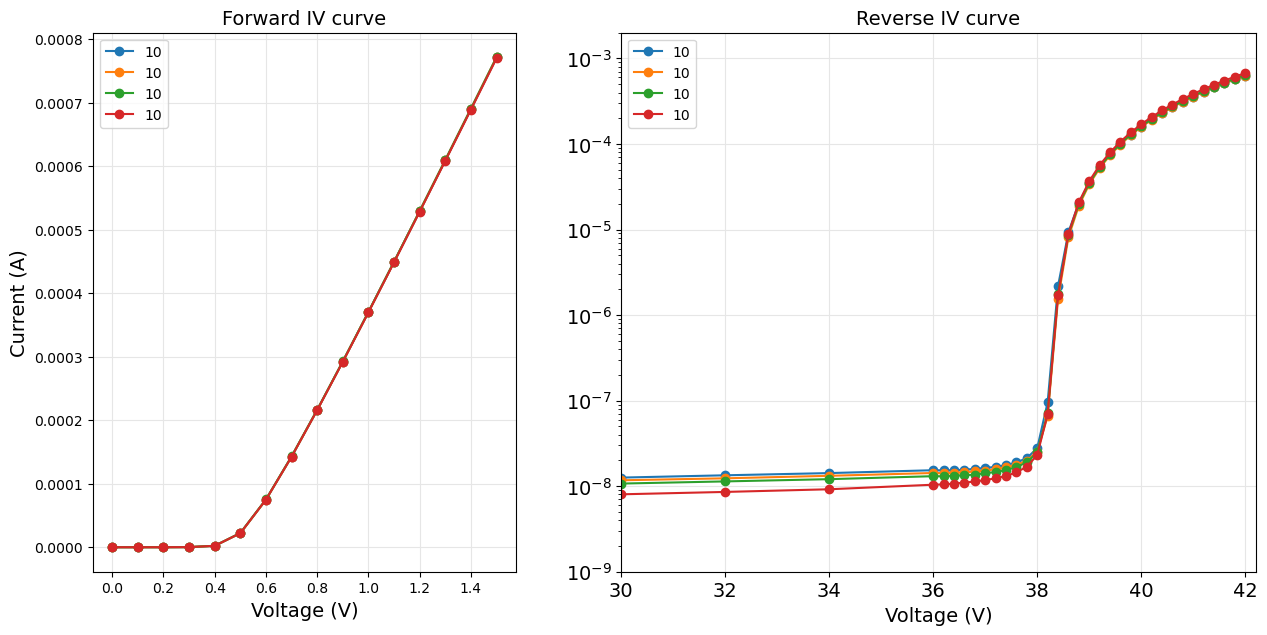

In [31]:
plottingListIVCurve(dfl_tmp, 16, CH_tmp)

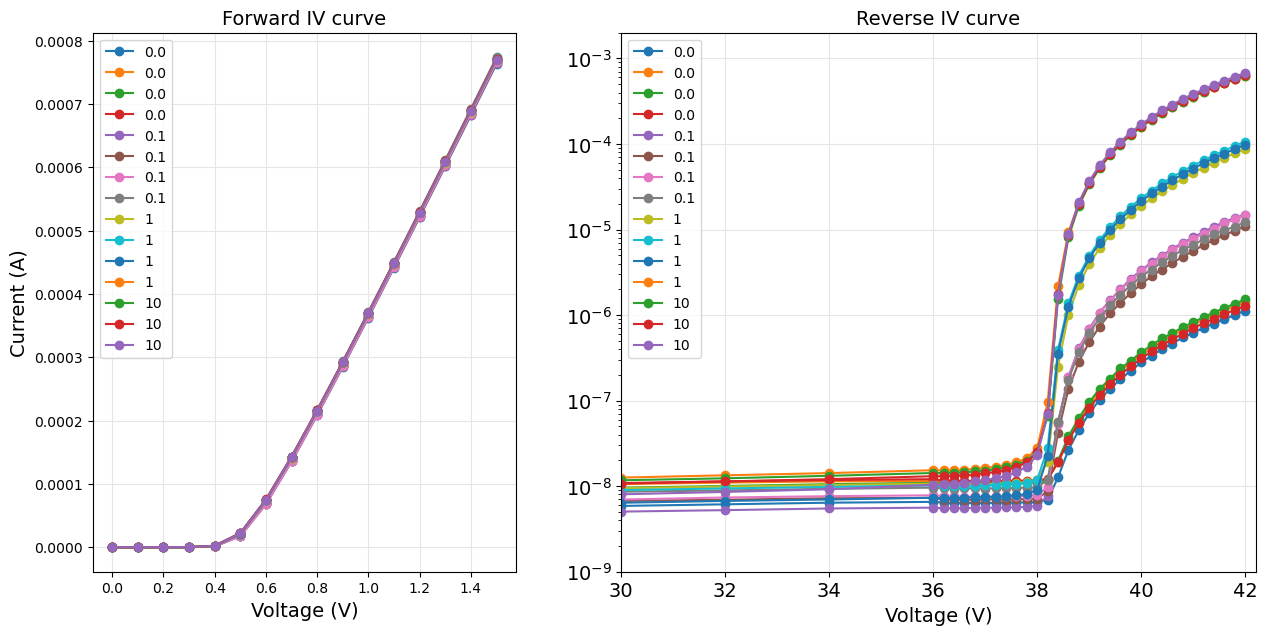

In [32]:
#HAMAMATSU 0.0 0.1 1.0 10
file_tmp=["data/HAM_TILE01_CH00_16.07.2024-14:31:25.txt",
          "data/HAM_TILE01_CH09_16.07.2024-14:37:25.txt",
          "data/HAM_TILE01_CH14_16.07.2024-15:18:17.txt",
          "data/HAM_TILE01_CH48_16.07.2024-14:51:19.txt",
          "data/HAM_TILE01_CH00_18.07.2024-16:39:46.txt",
          "data/HAM_TILE01_CH01_18.07.2024-16:42:33.txt",
          "data/HAM_TILE01_CH08_18.07.2024-16:45:44.txt",
          "data/HAM_TILE01_CH09_18.07.2024-16:48:31.txt",          
          "data/HAM_TILE01_CH49_18.07.2024-18:52:45.txt",
          "data/HAM_TILE01_CH56_18.07.2024-18:23:24.txt",
          "data/HAM_TILE01_CH57_18.07.2024-18:26:22.txt",
          "data/HAM_TILE01_CH54_18.07.2024-19:03:21.txt",
          "data/HAM_TILE01_CH55_18.07.2024-19:06:09.txt",
          "data/HAM_TILE01_CH62_18.07.2024-19:08:54.txt",
          "data/HAM_TILE01_CH63_18.07.2024-19:11:46.txt"]

CH_tmp=["0.0","0.0","0.0","0.0",
        "0.1","0.1","0.1","0.1",
        "1","1","1","1",
        "10","10","10","10"]

dfl_tmp=[]
for name in file_tmp:
    if os.path.exists(name):
        dfl_tmp.append(readingOneFile(name))
    else:
        dfl_tmp.append(np.nan)
        
plottingListIVCurve(dfl_tmp, 16, CH_tmp)

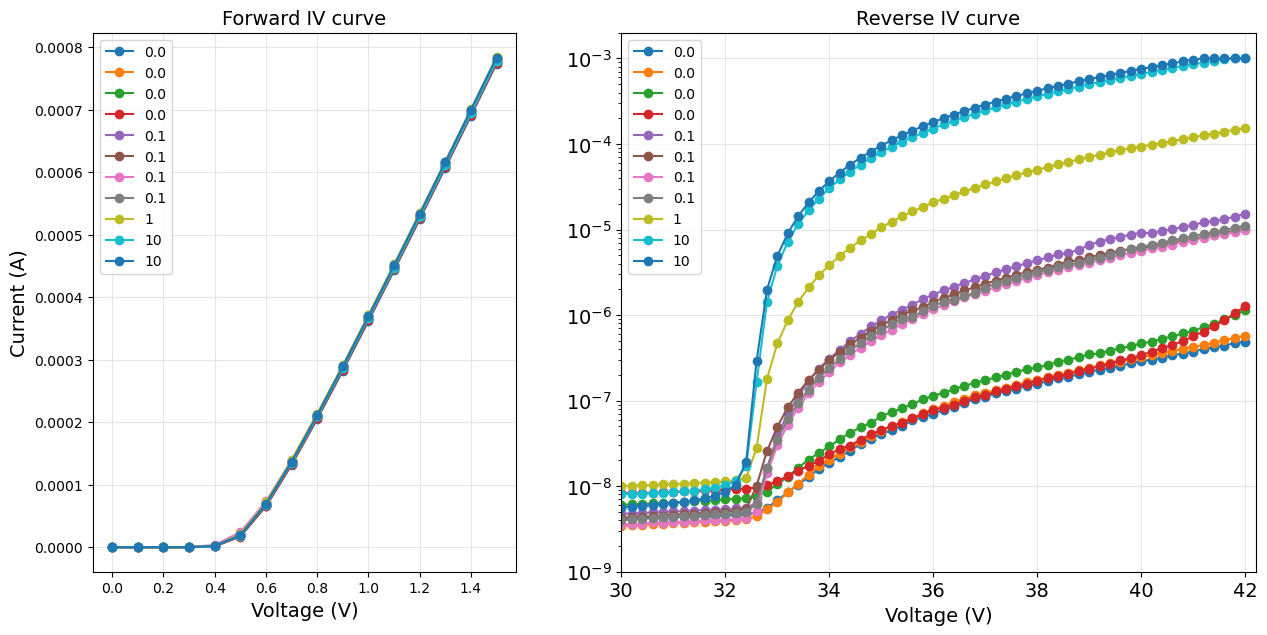

In [33]:
#FBK  0.0 0.1 1.0 10
file_tmp=["data/FBK_TILE01_CH00_15.07.2024-16:11:01.txt",
          "data/FBK_TILE01_CH09_15.07.2024-16:14:59.txt",
          "data/FBK_TILE01_CH12_15.07.2024-19:54:48.txt",
          "data/FBK_TILE01_CH48_15.07.2024-16:38:21.txt",
          "data/FBK_TILE05_CH00_18.07.2024-12:45:35.txt",
          "data/FBK_TILE05_CH01_18.07.2024-12:49:18.txt",
          "data/FBK_TILE05_CH08_18.07.2024-12:53:02.txt",
          "data/FBK_TILE05_CH09_18.07.2024-12:56:46.txt",
          "data/FBK_TILE01_CH07_17.07.2024-16:51:31.txt",
          "data/FBK_TILE01_CH00_17.07.2024-15:07:46.txt",
          "data/FBK_TILE01_CH09_17.07.2024-15:11:44.txt"]

CH_tmp=["0.0","0.0","0.0","0.0", 
        "0.1","0.1","0.1","0.1",
        "1","10","10"]

dfl_tmp=[]
for name in file_tmp:
    if os.path.exists(name):
        dfl_tmp.append(readingOneFile(name))
    else:
        dfl_tmp.append(np.nan)
        
plottingListIVCurve(dfl_tmp, 16, CH_tmp)

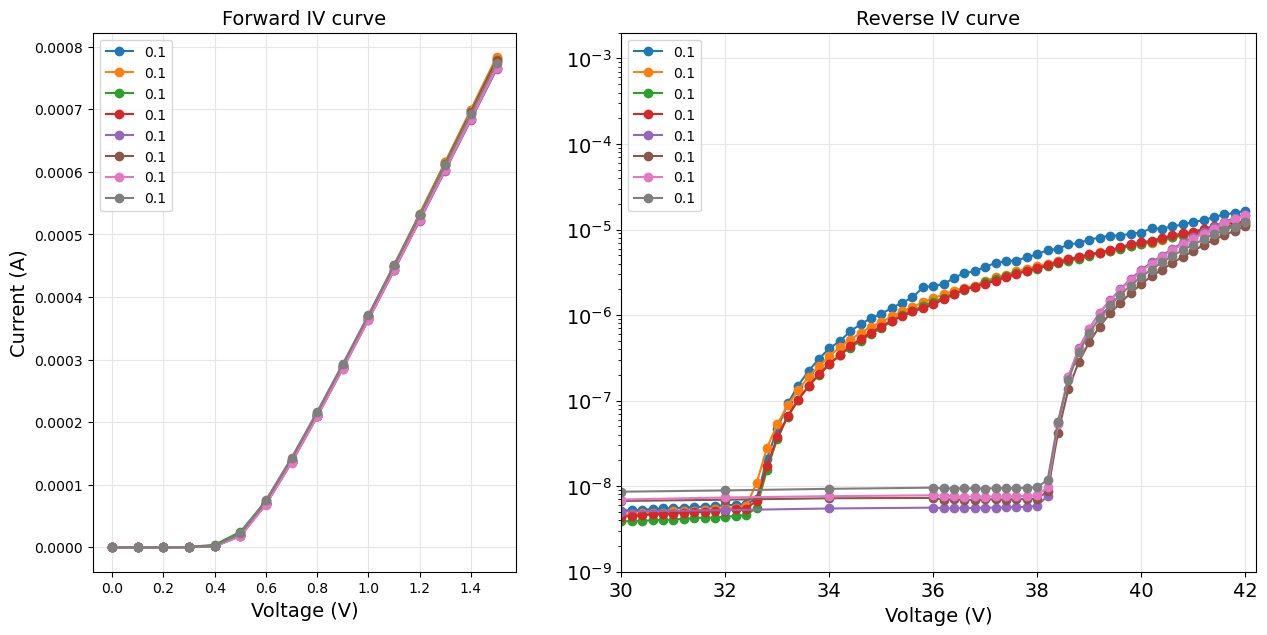

In [34]:
#FBK HAM 0.1
file_tmp=["data/FBK_TILE05_CH00_17.07.2024-19:02:08.txt",
          "data/FBK_TILE05_CH01_17.07.2024-19:12:52.txt",
          "data/FBK_TILE05_CH08_17.07.2024-19:17:40.txt",
          "data/FBK_TILE05_CH09_17.07.2024-19:21:35.txt",
          "data/HAM_TILE01_CH00_18.07.2024-16:39:46.txt",
          "data/HAM_TILE01_CH01_18.07.2024-16:42:33.txt",
          "data/HAM_TILE01_CH08_18.07.2024-16:45:44.txt",
          "data/HAM_TILE01_CH09_18.07.2024-16:48:31.txt"]

CH_tmp=["0.1","0.1","0.1","0.1","0.1","0.1","0.1","0.1"]

dfl_tmp=[]
for name in file_tmp:
    if os.path.exists(name):
        dfl_tmp.append(readingOneFile(name))
    else:
        dfl_tmp.append(np.nan)
        
plottingListIVCurve(dfl_tmp, 16, CH_tmp)

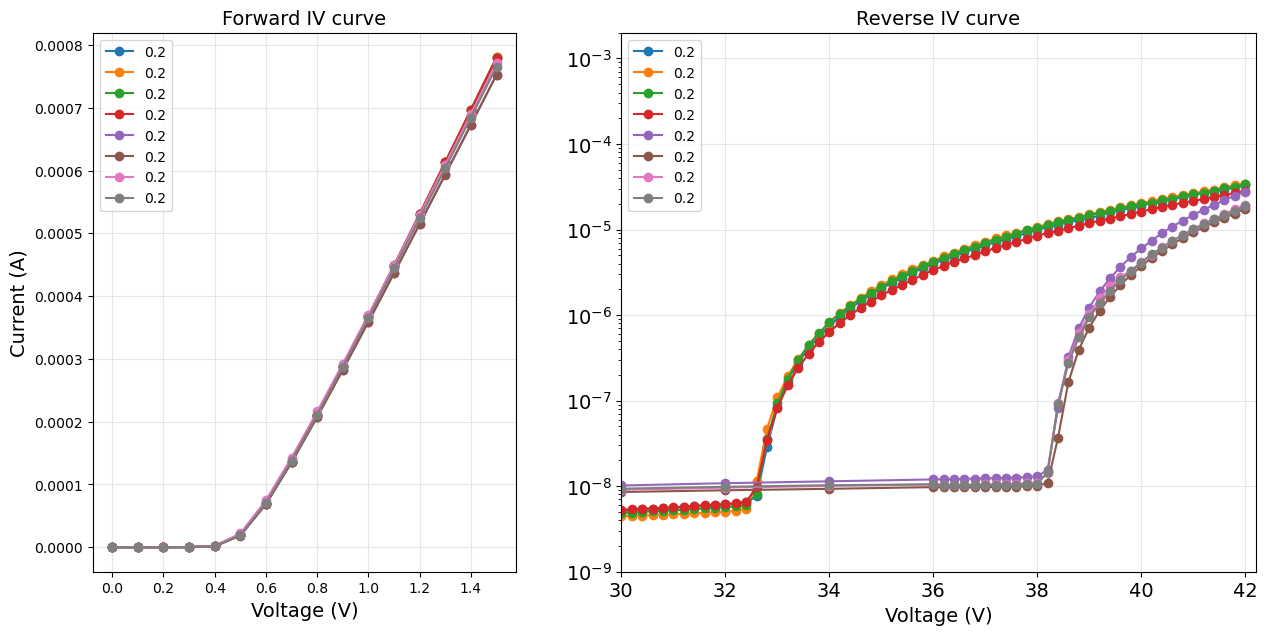

In [35]:
#FBK HAM 0.2
file_tmp=["data/FBK_TILE05_CH06_18.07.2024-13:29:39.txt",
          "data/FBK_TILE05_CH07_18.07.2024-13:34:07.txt",
          "data/FBK_TILE05_CH14_18.07.2024-13:38:07.txt",
          "data/FBK_TILE05_CH15_18.07.2024-13:41:52.txt",
          
          "data/HAM_TILE01_CH06_18.07.2024-17:16:11.txt",
          "data/HAM_TILE01_CH07_18.07.2024-17:18:58.txt",
          "data/HAM_TILE01_CH14_18.07.2024-17:22:03.txt",
          "data/HAM_TILE01_CH15_18.07.2024-17:24:50.txt"]

CH_tmp=["0.2","0.2","0.2","0.2","0.2","0.2","0.2","0.2"]

dfl_tmp=[]
for name in file_tmp:
    if os.path.exists(name):
        dfl_tmp.append(readingOneFile(name))
    else:
        dfl_tmp.append(np.nan)
        
plottingListIVCurve(dfl_tmp, 16, CH_tmp)

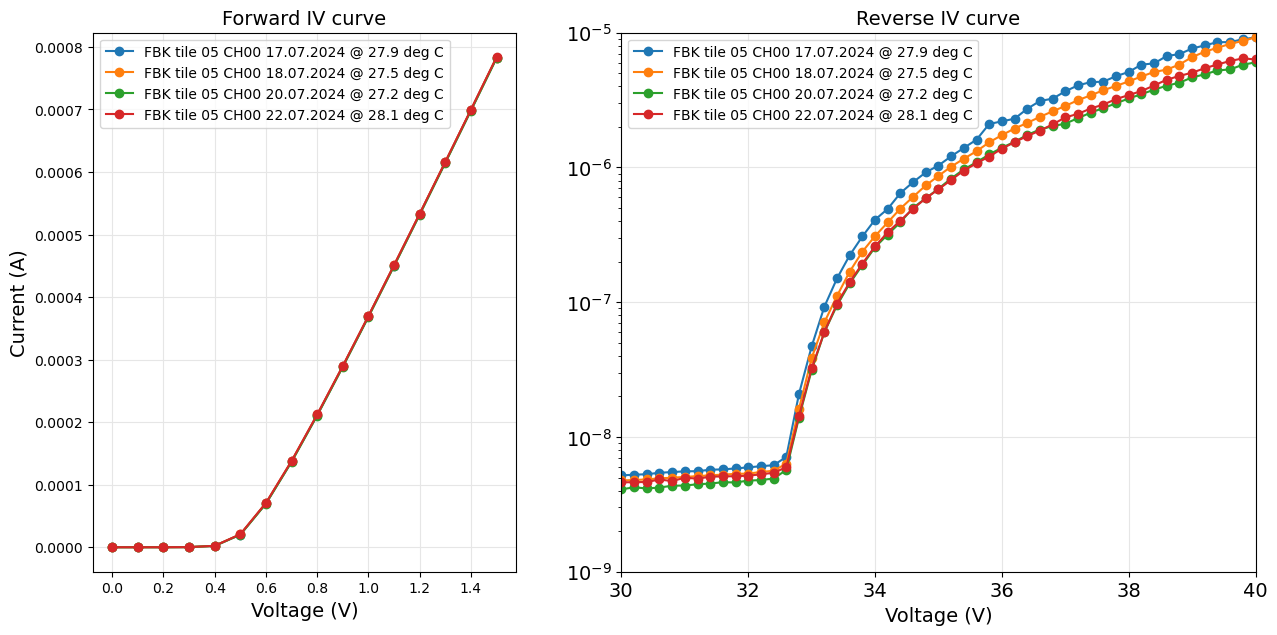

In [97]:
#FBK 0.1Gy CH00
file_tmp=["data/FBK_TILE05_CH00_17.07.2024-19:02:08.txt",
          "data/FBK_TILE05_CH00_18.07.2024-12:45:35.txt",
          "data/FBK_TILE05_CH00_20.07.2024-11:50:36.txt",
          "data/FBK_TILE05_CH00_22.07.2024-13:54:15.txt"]

CH_tmp=["FBK tile 05 CH00 17.07.2024 @ 27.9 deg C",
        "FBK tile 05 CH00 18.07.2024 @ 27.5 deg C",
        "FBK tile 05 CH00 20.07.2024 @ 27.2 deg C",
        "FBK tile 05 CH00 22.07.2024 @ 28.1 deg C",]

dfl_tmp=[]
for name in file_tmp:
    if os.path.exists(name):
        dfl_tmp.append(readingOneFile(name))
    else:
        dfl_tmp.append(np.nan)
        
plottingListIVCurve(dfl_tmp, 16, CH_tmp,
                   v_scale_min=30.0,v_scale_max=40.0,
                    I_scale_min=1.0e-9,I_scale_max=1.0e-5,
                    if_log_scale=1)

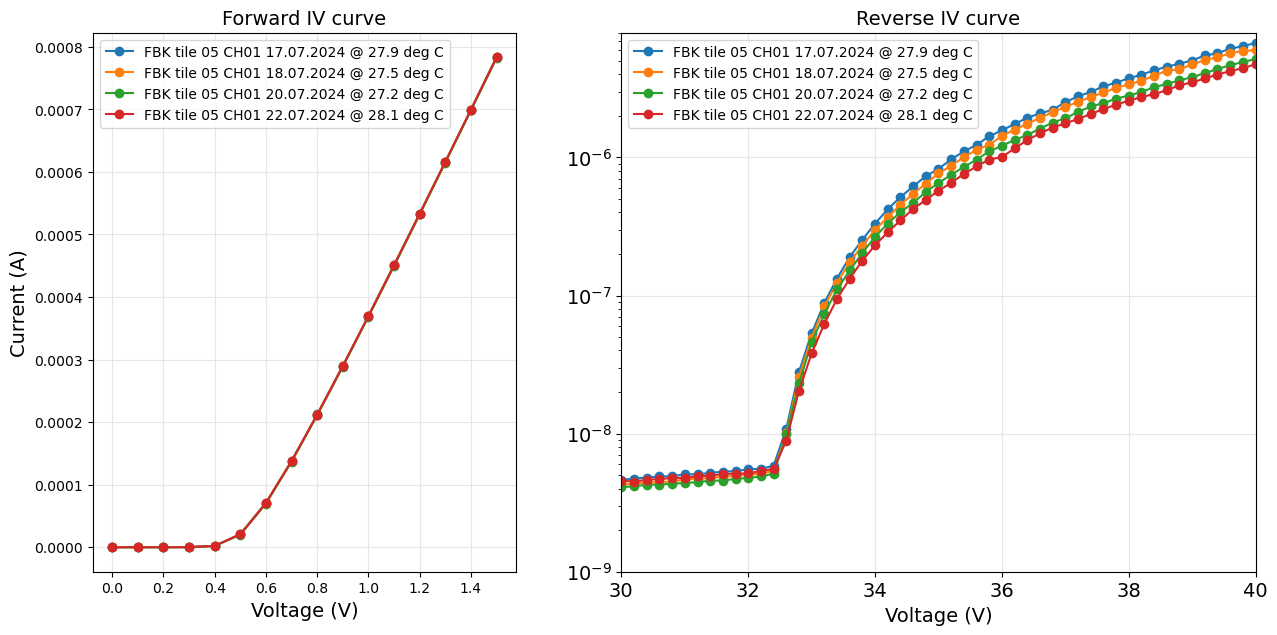

In [96]:
#FBK 0.1Gy CH01
file_tmp=["data/FBK_TILE05_CH01_17.07.2024-19:12:52.txt",
          "data/FBK_TILE05_CH01_18.07.2024-12:49:18.txt",
          "data/FBK_TILE05_CH01_20.07.2024-11:54:22.txt",
          "data/FBK_TILE05_CH01_22.07.2024-13:58:06.txt"]

CH_tmp=["FBK tile 05 CH01 17.07.2024 @ 27.9 deg C",
        "FBK tile 05 CH01 18.07.2024 @ 27.5 deg C",
        "FBK tile 05 CH01 20.07.2024 @ 27.2 deg C",
        "FBK tile 05 CH01 22.07.2024 @ 28.1 deg C",]

dfl_tmp=[]
for name in file_tmp:
    if os.path.exists(name):
        dfl_tmp.append(readingOneFile(name))
    else:
        dfl_tmp.append(np.nan)
        
plottingListIVCurve(dfl_tmp, 16, CH_tmp,
                    v_scale_min=30.0,v_scale_max=40.0,
                    I_scale_min=1.0e-9,I_scale_max=0.8e-5,
                    if_log_scale=1)

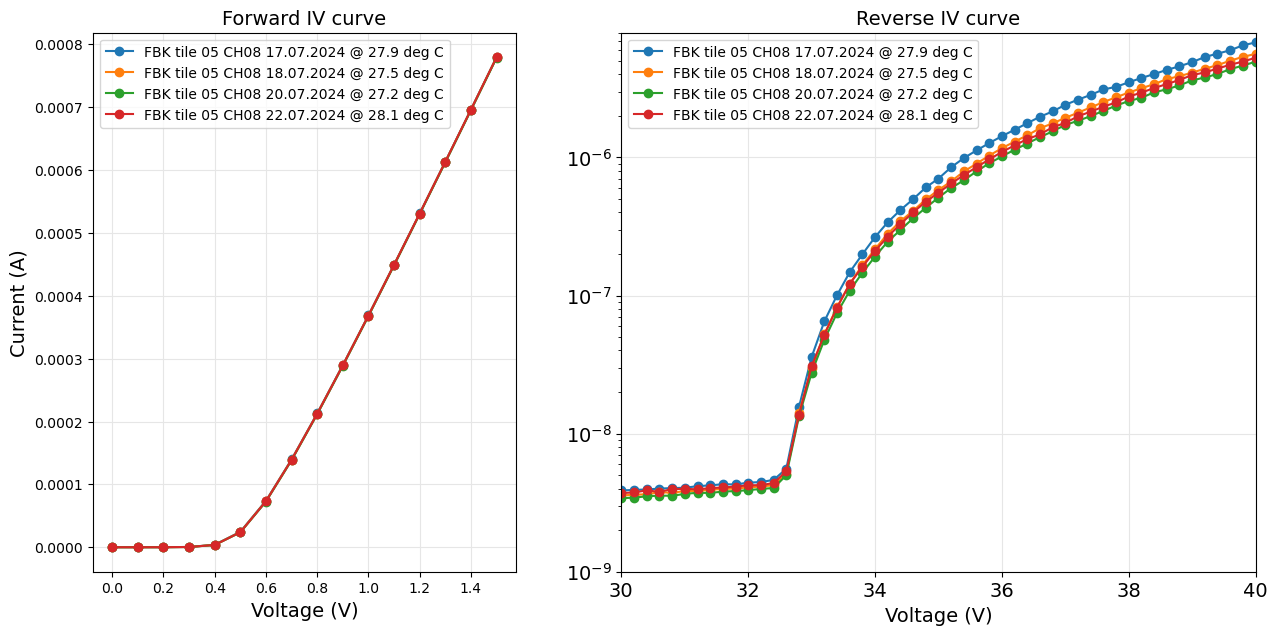

In [95]:
#FBK 0.1Gy CH08
file_tmp=["data/FBK_TILE05_CH08_17.07.2024-19:17:40.txt",
          "data/FBK_TILE05_CH08_18.07.2024-12:53:02.txt",
          "data/FBK_TILE05_CH08_20.07.2024-11:58:10.txt",
          "data/FBK_TILE05_CH08_22.07.2024-14:02:42.txt"]

CH_tmp=["FBK tile 05 CH08 17.07.2024 @ 27.9 deg C",
        "FBK tile 05 CH08 18.07.2024 @ 27.5 deg C",
        "FBK tile 05 CH08 20.07.2024 @ 27.2 deg C",
        "FBK tile 05 CH08 22.07.2024 @ 28.1 deg C",]

dfl_tmp=[]
for name in file_tmp:
    if os.path.exists(name):
        dfl_tmp.append(readingOneFile(name))
    else:
        dfl_tmp.append(np.nan)
        
plottingListIVCurve(dfl_tmp, 16, CH_tmp,
                    v_scale_min=30.0,v_scale_max=40.0,
                    I_scale_min=1.0e-9,I_scale_max=0.8e-5,
                    if_log_scale=1)

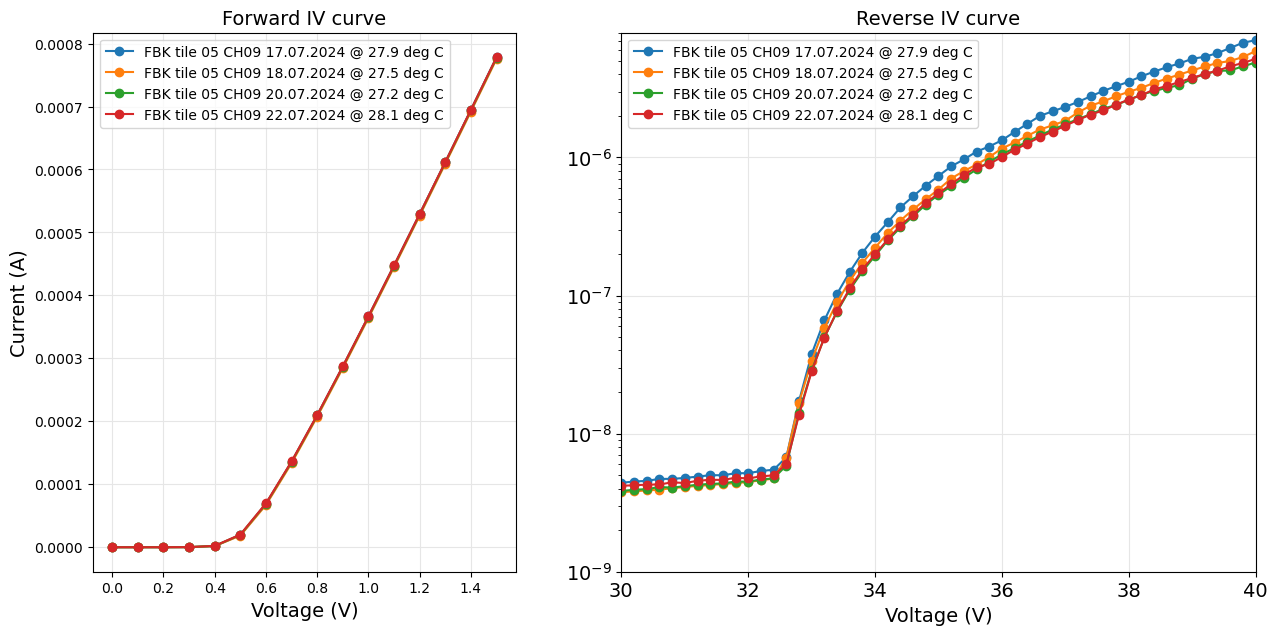

In [93]:
#FBK 0.1Gy CH09
file_tmp=["data/FBK_TILE05_CH09_17.07.2024-19:21:35.txt",
          "data/FBK_TILE05_CH09_18.07.2024-10:52:56.txt",
          "data/FBK_TILE05_CH09_20.07.2024-12:01:56.txt",
          "data/FBK_TILE05_CH09_22.07.2024-14:06:32.txt"]

CH_tmp=["FBK tile 05 CH09 17.07.2024 @ 27.9 deg C",
        "FBK tile 05 CH09 18.07.2024 @ 27.5 deg C",
        "FBK tile 05 CH09 20.07.2024 @ 27.2 deg C",
        "FBK tile 05 CH09 22.07.2024 @ 28.1 deg C",]

dfl_tmp=[]
for name in file_tmp:
    if os.path.exists(name):
        dfl_tmp.append(readingOneFile(name))
    else:
        dfl_tmp.append(np.nan)
        
plottingListIVCurve(dfl_tmp, 16, CH_tmp,
                    v_scale_min=30.0,v_scale_max=40.0,
                    I_scale_min=1.0e-9,I_scale_max=0.8e-5,
                    if_log_scale=1)

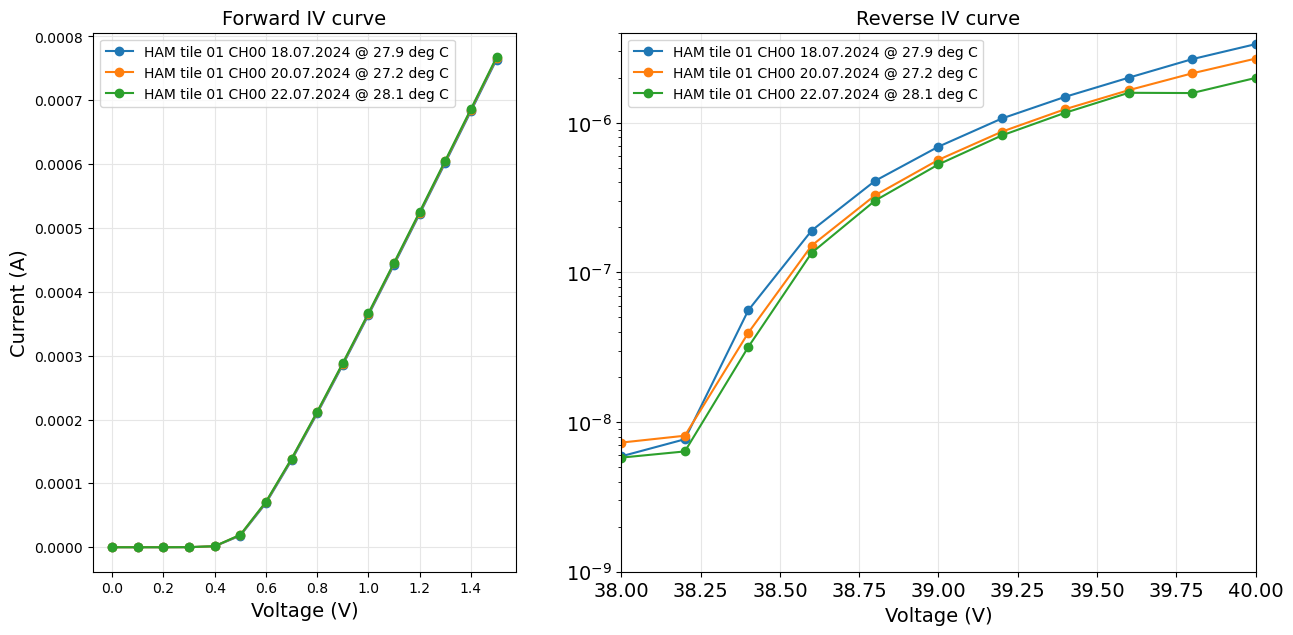

In [87]:
#HAM 0.1Gy CH00
file_tmp=["data/HAM_TILE01_CH00_18.07.2024-16:39:46.txt",
          "data/HAM_TILE01_CH00_20.07.2024-12:22:37.txt",
          "data/HAM_TILE01_CH00_22.07.2024-14:17:12.txt"]

CH_tmp=["HAM tile 01 CH00 18.07.2024 @ 27.9 deg C",
        "HAM tile 01 CH00 20.07.2024 @ 27.2 deg C",
        "HAM tile 01 CH00 22.07.2024 @ 28.1 deg C",]

dfl_tmp=[]
for name in file_tmp:
    if os.path.exists(name):
        dfl_tmp.append(readingOneFile(name))
    else:
        dfl_tmp.append(np.nan)
        
plottingListIVCurve(dfl_tmp, 16, CH_tmp,
                    v_scale_min=38.0,v_scale_max=40.0,
                    I_scale_min=1.0e-9,I_scale_max=0.4e-5,
                    if_log_scale=1)

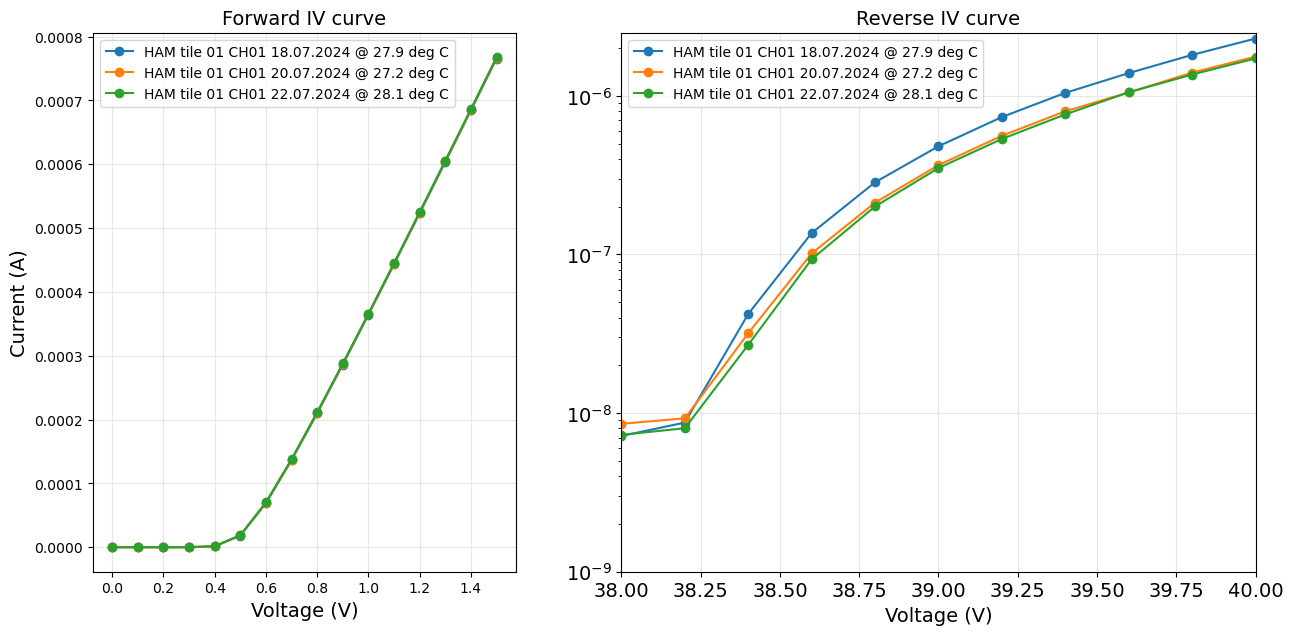

In [86]:
#HAM 0.1Gy CH01
file_tmp=["data/HAM_TILE01_CH01_18.07.2024-16:42:33.txt",
          "data/HAM_TILE01_CH01_20.07.2024-12:25:31.txt",
          "data/HAM_TILE01_CH01_22.07.2024-14:20:33.txt"]

CH_tmp=["HAM tile 01 CH01 18.07.2024 @ 27.9 deg C",
        "HAM tile 01 CH01 20.07.2024 @ 27.2 deg C",
        "HAM tile 01 CH01 22.07.2024 @ 28.1 deg C",]

dfl_tmp=[]
for name in file_tmp:
    if os.path.exists(name):
        dfl_tmp.append(readingOneFile(name))
    else:
        dfl_tmp.append(np.nan)
        
plottingListIVCurve(dfl_tmp, 16, CH_tmp,
                    v_scale_min=38.0,v_scale_max=40.0,
                    I_scale_min=1.0e-9,I_scale_max=0.25e-5,
                    if_log_scale=1)

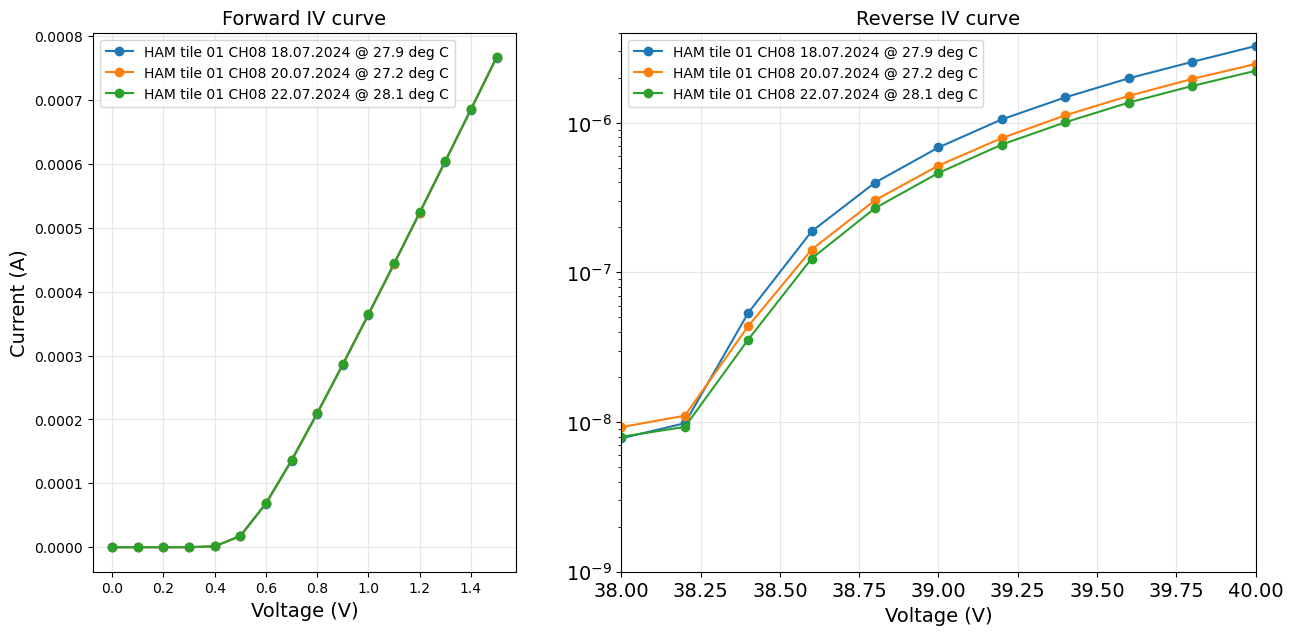

In [84]:
#HAM 0.1Gy CH08
file_tmp=["data/HAM_TILE01_CH08_18.07.2024-16:45:44.txt",
          "data/HAM_TILE01_CH08_20.07.2024-12:28:17.txt",
          "data/HAM_TILE01_CH08_22.07.2024-14:24:40.txt"]

CH_tmp=["HAM tile 01 CH08 18.07.2024 @ 27.9 deg C",
        "HAM tile 01 CH08 20.07.2024 @ 27.2 deg C",
        "HAM tile 01 CH08 22.07.2024 @ 28.1 deg C",]

dfl_tmp=[]
for name in file_tmp:
    if os.path.exists(name):
        dfl_tmp.append(readingOneFile(name))
    else:
        dfl_tmp.append(np.nan)
        
plottingListIVCurve(dfl_tmp, 16, CH_tmp,
                    v_scale_min=38.0,v_scale_max=40.0,
                    I_scale_min=1.0e-9,I_scale_max=0.4e-5,
                    if_log_scale=1)

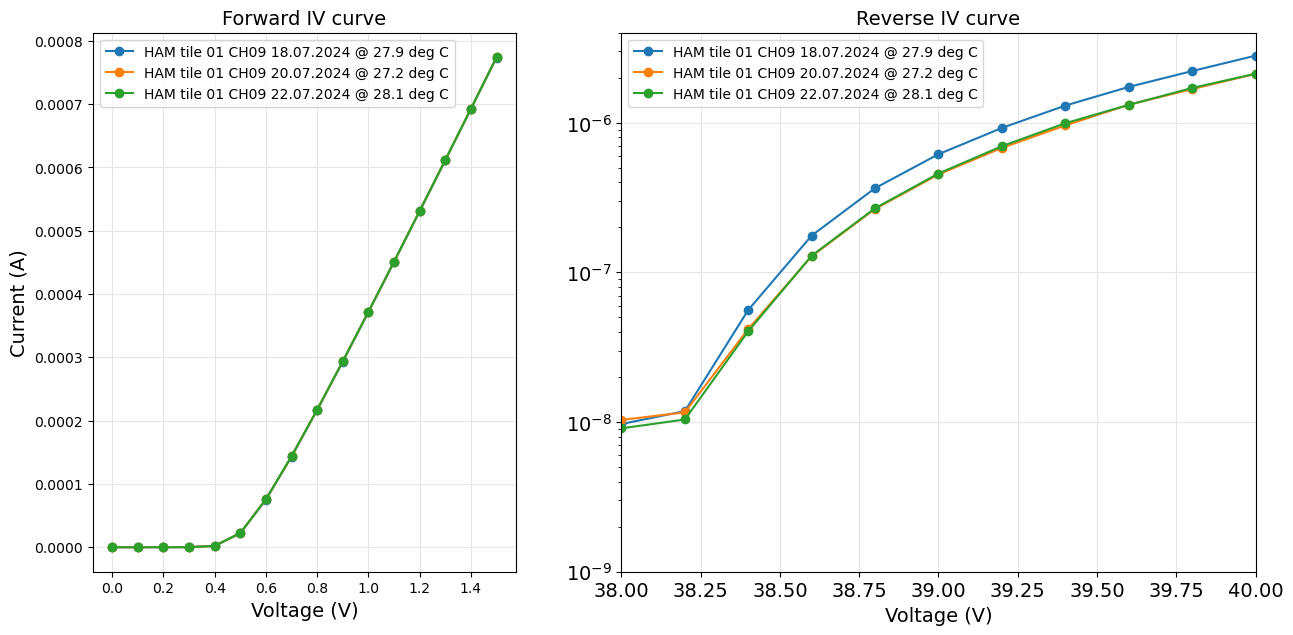

In [88]:
#HAM 0.1Gy CH09
file_tmp=["data/HAM_TILE01_CH09_18.07.2024-16:48:31.txt",
          "data/HAM_TILE01_CH09_20.07.2024-12:30:58.txt",
          "data/HAM_TILE01_CH09_22.07.2024-14:29:45.txt"]

CH_tmp=["HAM tile 01 CH09 18.07.2024 @ 27.9 deg C",
        "HAM tile 01 CH09 20.07.2024 @ 27.2 deg C",
        "HAM tile 01 CH09 22.07.2024 @ 28.1 deg C",]

dfl_tmp=[]
for name in file_tmp:
    if os.path.exists(name):
        dfl_tmp.append(readingOneFile(name))
    else:
        dfl_tmp.append(np.nan)
        
plottingListIVCurve(dfl_tmp, 16, CH_tmp,
                    v_scale_min=38.0,v_scale_max=40.0,
                    I_scale_min=1.0e-9,I_scale_max=0.4e-5,
                    if_log_scale=1)

In [36]:
np.sqrt(72)

8.48528137423857

In [37]:
#_nCH=64
#_vmin=30.0
#_vmax=50.0
#
#_name_pref_list=['../SiPM/FBK_sipm_tiles_terzina/Terzina_Tiles01/Terzina_Tiles01/20240528_IV_tile_01/CH',
#                 '../SiPM/FBK_sipm_tiles_terzina/Terzina_Tiles02/Terzina_Tiles02/20240611_IV_tile_02/CH',
#                 '../SiPM/FBK_sipm_tiles_terzina/Terzina_Tiles04/Terzina_Tiles04/20240618_IV_tile_04/CH',
#                 '../SiPM/FBK_sipm_tiles_terzina/Terzina_Tiles05/Terzina_Tiles05/20240620_IV_tile_05/CH',
#                 '../SiPM/FBK_sipm_tiles_terzina/Terzina_Tiles06/Terzina_Tiles06/20240624_IV_tile_06/CH']
#_tile_ID_list=['01','02','04','05','06']
#
#_name_pref=_name_pref_list[0]

In [38]:
#dfl_FBK=load_data(_name_pref,_nCH)

In [39]:
#dfl_FBK[0]

In [40]:
#vmin=-1.0
#vmax=50.0
#
#df0=dfl_FBK[0]
#df1=dfl_FBK[8]
#x=df0[(df0['CH1 Voltage']>vmin) & (df0['CH1 Voltage']<vmax)]['CH1 Voltage']
#y=df0[(df0['CH1 Voltage']>vmin) & (df0['CH1 Voltage']<vmax)]['CH1 Current']
#plt.scatter(x=x,y=y)
#plt.yscale('log')
#plt.grid(True)
#print(np.mean(y))
#
#x=df1[(df1['CH1 Voltage']>vmin) & (df1['CH1 Voltage']<vmax)]['CH1 Voltage']
#y=df1[(df1['CH1 Voltage']>vmin) & (df1['CH1 Voltage']<vmax)]['CH1 Current']
#plt.scatter(x=x,y=y)
#plt.yscale('log')
#plt.grid(True)
#print(np.mean(y))

In [41]:
#one_only = 1

#for i in np.arange(40,41):
#    vmin=37.0
#    vmax=38.0
    #
#    df0=dfl_FBK[i]
#    x=df0[(df0['CH1 Voltage']>vmin) & (df0['CH1 Voltage']<vmax)]['CH1 Voltage']
#    y=df0[(df0['CH1 Voltage']>vmin) & (df0['CH1 Voltage']<vmax)]['CH1 Current']
#    plt.scatter(x=x,y=y,alpha=0.1)
#    #plt.yscale('log')
#    plt.grid(True)
#    print(np.mean(y))
        
#    if (one_only == 1):
        #
#        df1=dfl[0]['VI_table']
#        x=np.abs(df1[(df1['Sourced_voltage']>vmin) & (df1['Sourced_voltage']<vmax)]['Sourced_voltage'])
#        y=np.abs(df1[(df1['Sourced_voltage']>vmin) & (df1['Sourced_voltage']<vmax)]['Current_Average'])
#        plt.scatter(x=x,y=y,alpha=1.0)
#        #plt.yscale('log')
#        plt.grid(True)
#        print(np.mean(y))
#        one_only=2

In [42]:
#for i in np.arange(0,63):
#    vmin=37.0
#    vmax=38.0
#    #
#    df0=dfl_FBK[i]
#    x=df0[(df0['CH1 Voltage']>vmin) & (df0['CH1 Voltage']<vmax)]['CH1 Voltage']
#    y=df0[(df0['CH1 Voltage']>vmin) & (df0['CH1 Voltage']<vmax)]['CH1 Current']
#    df0_y_mean = np.mean(y)
#    #
#    df1=dfl[0]['VI_table']
#    x=np.abs(df1[(df1['Sourced_voltage']>vmin) & (df1['Sourced_voltage']<vmax)]['Sourced_voltage'])
#    y=np.abs(df1[(df1['Sourced_voltage']>vmin) & (df1['Sourced_voltage']<vmax)]['Current_Average'])
#    print(i," ",(df0_y_mean-np.mean(y))/df0_y_mean)  

In [43]:
#y_fbk=dfl[0]['VI_table']['Current_Average'].values
#x_fbk=dfl[0]['VI_table']['Sourced_voltage'].values

In [44]:
#vmin=15.0
#vmax=30.0
#
#df0=dfl[0]['VI_table']
#df1=dfl_HAM_TILE01[0]['VI_table']
#x=np.abs(df0[(df0['Sourced_voltage']>vmin) & (df0['Sourced_voltage']<vmax)]['Sourced_voltage'])
#y=np.abs(df0[(df0['Sourced_voltage']>vmin) & (df0['Sourced_voltage']<vmax)]['Current_Average'])
#plt.scatter(x=x,y=y)
#plt.yscale('log')
#plt.grid(True)
#plt.xlim()
#plt.ylim(0.0,1e-8)
#print(np.mean(y))
#
#x=np.abs(df1[(df1['Sourced_voltage']>vmin) & (df1['Sourced_voltage']<vmax)]['Sourced_voltage'])
#y=np.abs(df1[(df1['Sourced_voltage']>vmin) & (df1['Sourced_voltage']<vmax)]['Current_Average'])
#plt.scatter(x=x,y=y)
#plt.yscale('log')
#plt.grid(True)
#print(np.mean(y))